In [0]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import tqdm
plt.style.use('ggplot')
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white")

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
mainPath = "/content/gdrive/My Drive/Hackathons" 

In [0]:
read_path = "/HDFC/"

In [0]:
file = "Train.csv"

In [0]:
data = pd.read_csv(mainPath+read_path + file)
data.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (746,835) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Col13,Col14,Col15,Col16,Col17,Col18,Col19,Col20,Col21,Col22,Col23,Col24,Col25,Col26,Col27,Col28,Col29,Col30,Col31,Col32,Col33,Col34,Col35,Col36,Col37,Col38,Col39,Col40,...,Col2358,Col2359,Col2360,Col2361,Col2362,Col2363,Col2364,Col2365,Col2366,Col2367,Col2368,Col2369,Col2370,Col2371,Col2372,Col2373,Col2374,Col2375,Col2376,Col2377,Col2378,Col2379,Col2380,Col2381,Col2382,Col2383,Col2384,Col2385,Col2386,Col2387,Col2388,Col2389,Col2390,Col2391,Col2392,Col2393,Col2394,Col2395,Col2396,Col2397
0,RIGHGSN,1,1.086711e+04,8.648345e+03,1.576618e+04,2.890466e+04,5.273655e+03,2.346153e+04,1.285597e+04,2.871509e+04,9.114586e+03,3.043078e+04,9.293496,8.570479,10.063117,10.271758,0.548538,0.403366,NaN,NaN,1.486524,1.728324,0.993441,1.297050,0.137398,0.115987,0.260428,1.414214,1,1,1,1,1,1,0,6,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,214.0,214.0,68.0,22.0,22.0,7.0
1,RIMHI5ZGP,0,2.584312e+05,2.179633e+05,1.866287e+05,1.866287e+05,2.154519e+05,1.923615e+05,1.726538e+05,1.666974e+05,2.013518e+05,1.859404e+05,12.462385,12.280493,12.167132,12.136876,1.167898,2.676398,NaN,NaN,0.792123,0.934556,0.893203,0.966620,0.753892,0.808295,1.414214,NaN,1,1,3,4,4,0,4,5,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,41.0,41.0,38.0,12.0,12.0,11.0
2,RIHOG1SZU,0,1.459355e+07,1.260060e+07,1.100315e+07,1.010315e+07,1.879882e+07,1.514035e+07,5.320778e+06,6.906324e+06,9.368338e+06,1.113330e+07,16.496090,16.749305,16.532874,16.128357,1.145182,2.203874,NaN,NaN,0.422264,0.498347,0.683582,0.735339,0.808115,0.776910,1.414214,NaN,3,3,4,12,4,0,2,4,NaN,1.0,NaN,NaN,...,1,0,1,0,1,0,0,0,0,0,2,0,1,1,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,1,1,0,378.0,378.0,310.0,21.0,21.0,16.0
3,RIHOLMQWU,0,6.727043e+05,8.181116e+05,6.794893e+05,6.794893e+05,8.257254e+05,7.605803e+05,3.577134e+05,4.236612e+05,4.304848e+05,4.065539e+05,13.419061,13.624018,13.541837,13.429097,1.204010,0.536304,NaN,NaN,0.437243,0.521341,0.623499,0.534531,-0.125829,0.388830,-1.414214,NaN,2,2,2,24,1,0,1,4,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1,2,0,1,2,0,0,0,0,0,1,2,0,0,0,0,0,1,2,0,0,0,0,0,0,702.0,702.0,644.0,951.0,951.0,743.0
4,RIHO584ET,0,-1.218742e+06,-3.005361e+06,-1.666241e+05,-2.403574e+06,2.583183e+06,2.086546e+06,5.938358e+06,5.446532e+06,3.473444e+06,3.262168e+06,NaN,14.764533,14.551021,NaN,NaN,NaN,NaN,NaN,NaN,1.344637,NaN,1.563430,-0.113101,0.617486,1.414214,NaN,4,3,4,68,8,0,2,4,NaN,3.0,NaN,NaN,...,0,0,0,0,0,0,2,1,0,0,0,0,2,1,2,1,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1305.0,1305.0,1211.0,2205.0,2205.0,1831.0


In [0]:
data.shape

(17521, 2395)

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17521 entries, 0 to 17520
Columns: 2395 entries, Col1 to Col2397
dtypes: float64(844), int64(1548), object(3)
memory usage: 320.2+ MB


# PreProcessing

In [0]:
data.isna().sum().sort_values()[2165:]

Col458     6527
Col911     6783
Col102     7051
Col116     7432
Col103     7531
Col117     7646
Col104     8012
Col118     8434
Col97      9356
Col111     9410
Col105     9718
Col119     9841
Col698    10713
Col787    10732
Col770    11050
Col859    11050
Col701    11413
Col690    11413
Col790    11428
Col779    11428
Col751    11485
Col767    11485
Col840    11515
Col856    11515
Col695    11823
Col685    11823
Col784    11838
Col774    11838
Col760    11955
Col849    11970
          ...  
Col352    16895
Col747    16895
Col373    16895
Col836    16897
Col570    16897
Col549    16897
Col920    16902
Col925    16905
Col348    16965
Col743    16965
Col369    16965
Col545    16968
Col566    16968
Col832    16968
Col338    16979
Col733    16979
Col359    16979
Col535    16985
Col822    16985
Col556    16985
Col38     17035
Col40     17046
Col930    17127
Col171    17411
Col463    17514
Col266    17514
Col288    17514
Col724    17514
Col813    17514
Col485    17514
Length: 230, dtype: int6

In [0]:
# Thumb atleast 70 of data points should be there
6527/17514

0.372673289939477

In [0]:
no = data.isna().sum().sort_values()[2166:].index

In [0]:
remove_col2 = []
for i in data.columns:
    if i not in no:
        remove_col2.append(i)
print(remove_col2)

['Col1', 'Col2', 'Col3', 'Col4', 'Col5', 'Col6', 'Col7', 'Col8', 'Col9', 'Col10', 'Col11', 'Col12', 'Col13', 'Col14', 'Col15', 'Col16', 'Col17', 'Col18', 'Col21', 'Col22', 'Col23', 'Col24', 'Col25', 'Col26', 'Col27', 'Col29', 'Col30', 'Col31', 'Col32', 'Col33', 'Col34', 'Col35', 'Col36', 'Col42', 'Col43', 'Col44', 'Col45', 'Col46', 'Col47', 'Col48', 'Col49', 'Col50', 'Col51', 'Col52', 'Col53', 'Col54', 'Col55', 'Col56', 'Col57', 'Col58', 'Col59', 'Col60', 'Col61', 'Col62', 'Col63', 'Col64', 'Col65', 'Col66', 'Col67', 'Col68', 'Col69', 'Col70', 'Col71', 'Col72', 'Col73', 'Col74', 'Col75', 'Col76', 'Col77', 'Col78', 'Col79', 'Col80', 'Col81', 'Col82', 'Col83', 'Col84', 'Col85', 'Col86', 'Col87', 'Col88', 'Col89', 'Col90', 'Col91', 'Col92', 'Col93', 'Col94', 'Col95', 'Col96', 'Col98', 'Col100', 'Col101', 'Col106', 'Col107', 'Col108', 'Col109', 'Col110', 'Col112', 'Col114', 'Col115', 'Col120', 'Col121', 'Col122', 'Col123', 'Col124', 'Col125', 'Col126', 'Col127', 'Col128', 'Col129', 'Col130

In [0]:
# High points are missing 
data1 = data[remove_col2]

In [0]:
data1.shape

(17521, 2166)

In [0]:
data1.drop(['Col1'], axis = 1, inplace = True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [0]:
data1.head(3)

,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Col13,Col14,Col15,Col16,Col17,Col18,Col21,Col22,Col23,Col24,Col25,Col26,Col27,Col29,Col30,Col31,Col32,Col33,Col34,Col35,Col36,Col42,Col43,Col44,Col45,Col46,Col47,Col48,Col49,...,Col2358,Col2359,Col2360,Col2361,Col2362,Col2363,Col2364,Col2365,Col2366,Col2367,Col2368,Col2369,Col2370,Col2371,Col2372,Col2373,Col2374,Col2375,Col2376,Col2377,Col2378,Col2379,Col2380,Col2381,Col2382,Col2383,Col2384,Col2385,Col2386,Col2387,Col2388,Col2389,Col2390,Col2391,Col2392,Col2393,Col2394,Col2395,Col2396,Col2397
0,1,1.086711e+04,8.648345e+03,1.576618e+04,2.890466e+04,5.273655e+03,2.346153e+04,1.285597e+04,2.871509e+04,9.114586e+03,3.043078e+04,9.293496,8.570479,10.063117,10.271758,0.548538,0.403366,1.486524,1.728324,0.993441,1.297050,0.137398,0.115987,0.260428,1,1,1,1,1,1,0,6,6.07,6.07,2,3,2,3,2,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,214.0,214.0,68.0,22.0,22.0,7.0
1,0,2.584312e+05,2.179633e+05,1.866287e+05,1.866287e+05,2.154519e+05,1.923615e+05,1.726538e+05,1.666974e+05,2.013518e+05,1.859404e+05,12.462385,12.280493,12.167132,12.136876,1.167898,2.676398,0.792123,0.934556,0.893203,0.966620,0.753892,0.808295,1.414214,1,1,3,4,4,0,4,5,116.65,116.65,3,0,2,0,2,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,41.0,41.0,38.0,12.0,12.0,11.0
2,0,1.459355e+07,1.260060e+07,1.100315e+07,1.010315e+07,1.879882e+07,1.514035e+07,5.320778e+06,6.906324e+06,9.368338e+06,1.113330e+07,16.496090,16.749305,16.532874,16.128357,1.145182,2.203874,0.422264,0.498347,0.683582,0.735339,0.808115,0.776910,1.414214,3,3,4,12,4,0,2,4,33.28,33.28,2,1,2,0,1,0,...,1,0,1,0,1,0,0,0,0,0,2,0,1,1,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,1,1,0,378.0,378.0,310.0,21.0,21.0,16.0


In [0]:
data1["Col2"].value_counts()

0    15760
1     1761
Name: Col2, dtype: int64

In [0]:
1761/17521

0.10050796187432225

In [0]:
X = data1.iloc[:,1:].values

In [0]:
Y = data1['Col2'].values

In [0]:
X

array([[1.08671100e+04, 8.64834500e+03, 1.57661791e+04, ...,
        2.20000000e+01, 2.20000000e+01, 7.00000000e+00],
       [2.58431243e+05, 2.17963272e+05, 1.86628682e+05, ...,
        1.20000000e+01, 1.20000000e+01, 1.10000000e+01],
       [1.45935482e+07, 1.26006039e+07, 1.10031452e+07, ...,
        2.10000000e+01, 2.10000000e+01, 1.60000000e+01],
       ...,
       [4.22094133e+04, 3.17377125e+04, 2.53901700e+04, ...,
        4.00000000e+00, 4.00000000e+00, 2.00000000e+00],
       [7.04849633e+04, 9.81461029e+04, 9.81461029e+04, ...,
        1.00000000e+01, 9.00000000e+00, 4.00000000e+00],
       [1.01919833e+04, 1.01442625e+04, 1.01442625e+04, ...,
        4.00000000e+00, 4.00000000e+00, 3.00000000e+00]])

In [0]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='median')

In [0]:
X_imp = imp.fit_transform(X)

In [0]:
X_imp

array([[1.08671100e+04, 8.64834500e+03, 1.57661791e+04, ...,
        2.20000000e+01, 2.20000000e+01, 7.00000000e+00],
       [2.58431243e+05, 2.17963272e+05, 1.86628682e+05, ...,
        1.20000000e+01, 1.20000000e+01, 1.10000000e+01],
       [1.45935482e+07, 1.26006039e+07, 1.10031452e+07, ...,
        2.10000000e+01, 2.10000000e+01, 1.60000000e+01],
       ...,
       [4.22094133e+04, 3.17377125e+04, 2.53901700e+04, ...,
        4.00000000e+00, 4.00000000e+00, 2.00000000e+00],
       [7.04849633e+04, 9.81461029e+04, 9.81461029e+04, ...,
        1.00000000e+01, 9.00000000e+00, 4.00000000e+00],
       [1.01919833e+04, 1.01442625e+04, 1.01442625e+04, ...,
        4.00000000e+00, 4.00000000e+00, 3.00000000e+00]])

In [0]:
# Train Test split

In [0]:
trainX = X_imp[:12265]
trainX.shape

(12265, 2164)

In [0]:
testX = X_imp[12265:]
testX.shape

(5256, 2164)

In [0]:
trainY = Y[:12265]
trainY.shape

(12265,)

In [0]:
testY = Y[12265:]
testY.shape

(5256,)

## Baseline Model RF

In [0]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn import  metrics
from sklearn.model_selection import cross_validate

In [0]:
param_grid = { 
    'n_estimators': [350,400,420],
    'max_depth' : [8,10,12],
   'min_samples_split': [2,3,5,7],
    'min_samples_leaf': [2]
}

In [0]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0)

In [0]:
clf = GridSearchCV(estimator= clf, param_grid=param_grid, cv= 5)
clf.fit(trainX, trainY)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=0,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'m

In [0]:
clf.best_params_

{'max_depth': 10,
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 400}

In [0]:
clf = RandomForestClassifier(random_state = 0, max_depth = 10 , min_samples_leaf = 2, min_samples_split = 5, n_estimators = 400 )

In [0]:
clf.fit(trainX, trainY)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

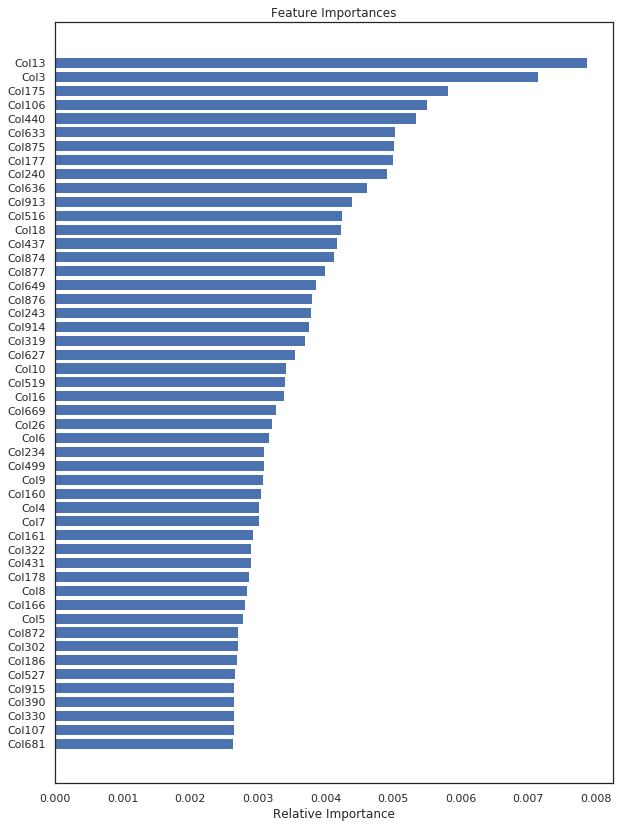

In [0]:
features = data1.iloc[:,1:].columns
importances = clf.feature_importances_
indices = np.argsort(importances)[-50:]  # top 10 features
plt.figure(figsize=(10, 14))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [0]:
y_pred = clf.predict(testX)

In [0]:
from sklearn.metrics import classification_report, f1_score

In [0]:
print(classification_report(testY, y_pred))

              precision    recall  f1-score   support

           0       0.90      1.00      0.94      4707
           1       0.00      0.00      0.00       549

    accuracy                           0.90      5256
   macro avg       0.45      0.50      0.47      5256
weighted avg       0.80      0.90      0.85      5256



In [0]:
rd_clf = RandomForestClassifier( random_state = 0 )

In [0]:
"""random_grid = {'bootstrap': [True, False],
               'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': [1, 2, 4],
               'min_samples_split': [2, 5, 10],
               'n_estimators': [130, 180, 230]}"""

In [0]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
# parameters for GridSearchCV
# specify parameters and distributions to sample from
param_dist = {
              'n_estimators': [200, 300, 400, 500],
              "max_depth": [5, 7,10],
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(2, 11),
              "min_samples_leaf": sp_randint(1, 11),
             }
# run randomized search
n_iter_search = 20
random_search = RandomizedSearchCV(rd_clf, param_distributions=param_dist,
                                   n_iter=n_iter_search)

In [0]:
random_search.fit(trainX, trainY)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs

In [0]:
random_search.best_params_

{'max_depth': 7,
 'max_features': 6,
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 400}

In [0]:
random_search.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=7, max_features=6, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [0]:
y_pred2 = random_search.predict(testX)

In [0]:
print(classification_report(testY, y_pred2))

              precision    recall  f1-score   support

           0       0.90      1.00      0.94      4707
           1       0.00      0.00      0.00       549

    accuracy                           0.90      5256
   macro avg       0.45      0.50      0.47      5256
weighted avg       0.80      0.90      0.85      5256



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Results

In [0]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier( max_depth=7, min_samples_leaf=2, min_samples_split=10,
                        n_estimators=400, random_state=0, verbose=0)

In [0]:
clf.fit(X_imp, Y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=7, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [0]:
data2 = pd.read_csv(mainPath+read_path + "Test.csv")
data2.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (700,731,740,752,761,789,811,820,829,841,850) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Col1,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Col13,Col14,Col15,Col16,Col17,Col18,Col19,Col20,Col21,Col22,Col23,Col24,Col25,Col26,Col27,Col28,Col29,Col30,Col31,Col32,Col33,Col34,Col35,Col36,Col37,Col38,Col39,Col40,Col41,...,Col2358,Col2359,Col2360,Col2361,Col2362,Col2363,Col2364,Col2365,Col2366,Col2367,Col2368,Col2369,Col2370,Col2371,Col2372,Col2373,Col2374,Col2375,Col2376,Col2377,Col2378,Col2379,Col2380,Col2381,Col2382,Col2383,Col2384,Col2385,Col2386,Col2387,Col2388,Col2389,Col2390,Col2391,Col2392,Col2393,Col2394,Col2395,Col2396,Col2397
0,RIGD58ZWD,8.167140e+04,8.614542e+04,7.532296e+04,7.532296e+04,1.125174e+05,1.002778e+05,2.038915e+04,3.053853e+04,8.395911e+04,8.138800e+04,11.310459,11.630863,11.515700,11.229540,1.143681,0.879545,NaN,NaN,0.236683,0.746188,0.405435,0.811625,0.086109,0.238817,0.150242,NaN,3,3,6,6,6,0,1,5,19.0,NaN,NaN,39.0,NaN,...,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,44.0,44.0,23.0,41.0,41.0,36.0
1,RIH660YDS,-1.362824e+07,-4.493043e+06,-3.777257e+06,-4.493043e+06,-4.749764e+06,-4.749764e+06,1.147556e+07,1.147556e+07,1.272055e+07,1.272055e+07,NaN,NaN,NaN,NaN,NaN,-2.935756,-232.140528,-94.995287,NaN,NaN,NaN,NaN,-0.483522,-0.308259,-0.742190,NaN,6,5,7,19,9,0,2,6,2.0,0.0,NaN,5.0,4.0,...,0,0,1,0,0,0,2,2,1,1,0,0,1,2,1,1,2,1,1,1,2,1,3,1,2,1,0,0,1,1,1,1,2,2,1234.0,1234.0,680.0,154.0,153.0,86.0
2,RIH660Q96,1.302700e+06,1.341449e+06,1.240085e+06,1.341449e+06,1.477503e+06,1.477503e+06,3.904086e+05,3.904086e+05,4.979106e+05,4.979106e+05,14.079949,14.205864,14.205864,14.109261,1.081739,0.943850,2.122872,0.857057,0.291035,0.336995,0.291035,0.336995,-0.108229,-0.095389,-0.053413,NaN,2,2,2,3,1,0,1,6,NaN,NaN,NaN,NaN,5.0,...,0,0,0,0,0,0,0,0,1,0,2,1,0,1,0,0,0,0,2,1,2,1,0,0,0,0,0,0,0,0,0,0,0,0,33.0,24.0,19.0,3.0,1.0,1.0
3,RIYDO15W1,1.932258e+05,1.454433e+05,1.929148e+05,1.454433e+05,1.318250e+04,1.318250e+04,8.650108e+04,8.650108e+04,5.896693e+03,5.896693e+03,12.171615,9.486645,9.486645,11.887541,0.753925,1.978542,NaN,NaN,0.594741,0.447312,0.594741,0.447312,0.441902,0.383241,0.681768,NaN,4,4,5,5,5,0,1,6,6.0,5.0,NaN,1.0,NaN,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8.0,8.0,3.0,7.0,7.0,3.0
4,RIYBGC1ZD,3.913385e+05,1.987337e+05,1.703432e+05,1.987337e+05,3.046536e+05,3.046536e+05,2.528307e+05,2.528307e+05,3.034449e+05,3.034449e+05,12.877328,12.626931,12.626931,12.199721,1.166667,63.849949,NaN,NaN,1.272208,0.996032,1.272208,0.996032,0.507021,0.539030,0.742665,NaN,1,1,1,1,1,0,1,6,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7.0,7.0,7.0,6.0,6.0,5.0


In [0]:
data2.shape

(20442, 2394)

In [0]:
remove_col2.remove('Col2')

ValueError: ignored

In [0]:
df2 = data2[remove_col2]

In [0]:
df2.shape

(20442, 2165)

In [0]:
df2.drop(['Col1'], inplace = True, axis = 1)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [0]:
df2.head()

,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Col13,Col14,Col15,Col16,Col17,Col18,Col21,Col22,Col23,Col24,Col25,Col26,Col27,Col29,Col30,Col31,Col32,Col33,Col34,Col35,Col36,Col42,Col43,Col44,Col45,Col46,Col47,Col48,Col49,Col50,...,Col2358,Col2359,Col2360,Col2361,Col2362,Col2363,Col2364,Col2365,Col2366,Col2367,Col2368,Col2369,Col2370,Col2371,Col2372,Col2373,Col2374,Col2375,Col2376,Col2377,Col2378,Col2379,Col2380,Col2381,Col2382,Col2383,Col2384,Col2385,Col2386,Col2387,Col2388,Col2389,Col2390,Col2391,Col2392,Col2393,Col2394,Col2395,Col2396,Col2397
0,8.167140e+04,8.614542e+04,7.532296e+04,7.532296e+04,1.125174e+05,1.002778e+05,2.038915e+04,3.053853e+04,8.395911e+04,8.138800e+04,11.310459,11.630863,11.515700,11.229540,1.143681,0.879545,0.236683,0.746188,0.405435,0.811625,0.086109,0.238817,0.150242,3,3,6,6,6,0,1,5,1.665000,1.665000,2,2,2,2,2,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,44.0,44.0,23.0,41.0,41.0,36.0
1,-1.362824e+07,-4.493043e+06,-3.777257e+06,-4.493043e+06,-4.749764e+06,-4.749764e+06,1.147556e+07,1.147556e+07,1.272055e+07,1.272055e+07,NaN,NaN,NaN,NaN,NaN,-2.935756,NaN,NaN,NaN,NaN,-0.483522,-0.308259,-0.742190,6,5,7,19,9,0,2,6,-126.895000,-126.895000,3,2,3,2,2,2,2,...,0,0,1,0,0,0,2,2,1,1,0,0,1,2,1,1,2,1,1,1,2,1,3,1,2,1,0,0,1,1,1,1,2,2,1234.0,1234.0,680.0,154.0,153.0,86.0
2,1.302700e+06,1.341449e+06,1.240085e+06,1.341449e+06,1.477503e+06,1.477503e+06,3.904086e+05,3.904086e+05,4.979106e+05,4.979106e+05,14.079949,14.205864,14.205864,14.109261,1.081739,0.943850,0.291035,0.336995,0.291035,0.336995,-0.108229,-0.095389,-0.053413,2,2,2,3,1,0,1,6,-0.613333,-0.613333,1,4,1,4,1,2,1,...,0,0,0,0,0,0,0,0,1,0,2,1,0,1,0,0,0,0,2,1,2,1,0,0,0,0,0,0,0,0,0,0,0,0,33.0,24.0,19.0,3.0,1.0,1.0
3,1.932258e+05,1.454433e+05,1.929148e+05,1.454433e+05,1.318250e+04,1.318250e+04,8.650108e+04,8.650108e+04,5.896693e+03,5.896693e+03,12.171615,9.486645,9.486645,11.887541,0.753925,1.978542,0.594741,0.447312,0.594741,0.447312,0.441902,0.383241,0.681768,4,4,5,5,5,0,1,6,28.863333,28.863333,3,2,3,2,3,1,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8.0,8.0,3.0,7.0,7.0,3.0
4,3.913385e+05,1.987337e+05,1.703432e+05,1.987337e+05,3.046536e+05,3.046536e+05,2.528307e+05,2.528307e+05,3.034449e+05,3.034449e+05,12.877328,12.626931,12.626931,12.199721,1.166667,63.849949,1.272208,0.996032,1.272208,0.996032,0.507021,0.539030,0.742665,1,1,1,1,1,0,1,6,363.116667,363.116667,5,0,4,0,3,0,3,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7.0,7.0,7.0,6.0,6.0,5.0


In [0]:
X_test = imp.transform(df2)

In [0]:
X_test

array([[ 8.16713967e+04,  8.61454200e+04,  7.53229617e+04, ...,
         4.10000000e+01,  4.10000000e+01,  3.60000000e+01],
       [-1.36282436e+07, -4.49304278e+06, -3.77725669e+06, ...,
         1.54000000e+02,  1.53000000e+02,  8.60000000e+01],
       [ 1.30269983e+06,  1.34144892e+06,  1.24008518e+06, ...,
         3.00000000e+00,  1.00000000e+00,  1.00000000e+00],
       ...,
       [ 1.75557957e+05,  1.40645728e+05,  1.12583248e+05, ...,
         1.00000000e+01,  1.00000000e+01,  5.00000000e+00],
       [ 6.80664267e+04,  6.33805820e+04,  6.41364200e+04, ...,
         9.00000000e+00,  9.00000000e+00,  3.00000000e+00],
       [-6.76663972e+07, -6.41644852e+07, -2.95196194e+07, ...,
         8.50000000e+01,  8.50000000e+01,  7.20000000e+01]])

In [0]:
pred = clf.predict(X_test)

In [0]:
res = pd.DataFrame({'Col1': data2['Col1'], 'Col2': pred})

In [0]:
res.Col2.value_counts()

0    20430
1       12
Name: Col2, dtype: int64

In [0]:
from google.colab import files
res.to_csv('res.csv')
files.download("res.csv")